### Requests 사용

In [2]:
# 서버에 페이지 정보요청 할 때 쓰는 라이브러리
import requests as req

In [3]:
url = 'https://www.naver.com/'
res = req.get(url)

# <Response [200]> 응답이 성공

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
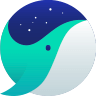
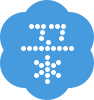

In [4]:
# 요청한 페이지 보기
res.text

### BeautifulSoup 사용하기
-- 내가 원하는 내용만 추출하기 위해 파싱해주는 라이브러리

- 파싱 : 어떤 페이지(html, 문서 등) 내가 원하는 데이터를 특정 패턴이나 순서로 추출하여 가공하는 것

In [6]:
from bs4 import BeautifulSoup as bs

In [7]:
# bs(가공할 데이터, 가공방식-파싱방법)
soup = bs(res.text, 'lxml')

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
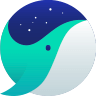
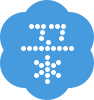

In [8]:
soup

In [9]:
# 내가 원하는 태그를 가져올때 쓰는 함수
result = soup.select('a.nav') # a태그이면서 class = nav 인것

In [10]:
result[2].text

'블로그'

In [11]:
# 맨 처음에 나오는 태그를 가지고 옴 select_one
soup.select_one('a').text

'뉴스스탠드 바로가기'

In [12]:
# 실습
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EA%B4%91%EC%A3%BC%EB%82%A0%EC%94%A8'
res = req.get(url)
soup = bs(res.text, 'lxml')
result = soup.select_one('div.temperature_text > strong') # > : 자식
result.text

'현재 온도2°'

### 멜론페이지

In [13]:
url = 'https://www.melon.com/'
res = req.get(url)
res
# <Response [406]> 응답거부

<Response [406]>

In [14]:
h = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36'}

In [15]:
url = 'https://www.melon.com/'
res = req.get(url, headers = h)
res

<Response [200]>

In [16]:
soup = bs(res.text, 'lxml')
result = soup.select('div#gnb_menu span.menu_bg') # > : 자식
result[0:8]
for i in result:
    print(i.text)

멜론차트
최신 음악
장르 음악
멜론DJ
멜론TV
스타포스트
매거진
뮤직어워드
어학
마이뮤직


In [17]:
# 실습2
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20211130'
res = req.get(url)
soup = bs(res.text, 'lxml')
result = soup.select('div.tit5 a')
for i in result:
    print(i.text)

나, 다니엘 블레이크
코다
파이란
타오르는 여인의 초상
꽃다발 같은 사랑을 했다
윤희에게
고장난 론
명탐정 코난: 비색의 탄환
고양이를 부탁해
너의 이름은.
가장 따뜻한 색, 블루
너와 파도를 탈 수 있다면
호빗 : 스마우그의 폐허
엔칸토: 마법의 세계
보이스
너의 췌장을 먹고 싶어
연애 빠진 로맨스
초속5센티미터
다가오는 것들
너의 췌장을 먹고 싶어
프렌치 디스패치
날씨의 아이
듄
유체이탈자
디어 에반 핸슨
아네트
퍼스널 쇼퍼
애비규환
장르만 로맨스
강릉
베놈 2: 렛 데어 비 카니지
이터널스


In [18]:
point = soup.select('td.point')
for i in point:
    print(i.text)

9.29
9.24
9.08
9.06
9.01
8.97
8.96
8.89
8.81
8.80
8.77
8.52
8.49
8.44
8.44
8.41
8.38
8.35
8.34
8.10
7.97
7.96
7.95
7.89
7.50
7.27
6.96
6.90
6.66
6.38
6.11
5.57


In [19]:
import pandas as pd

In [20]:
title_list = []
point_list = []
cnt_list = []

for i in range(len(result)):
    title_list.append(result[i].text)
    point_list.append(point[i].text)
    cnt_list.append(i+1)

In [21]:
dic = {'영화명' : title_list, '평점' : point_list, '순위' : cnt_list}

In [22]:
data = pd.DataFrame(dic)
data.set_index('순위')              # 한컬럼을 인덱스로 변경!!!!!!!!!!!!!!!!!
# set_index() 중요중요!!!

,영화명,평점
순위,,
1,"나, 다니엘 블레이크",9.29
2,코다,9.24
3,파이란,9.08
4,타오르는 여인의 초상,9.06
5,꽃다발 같은 사랑을 했다,9.01
6,윤희에게,8.97
7,고장난 론,8.96
8,명탐정 코난: 비색의 탄환,8.89
9,고양이를 부탁해,8.81


In [23]:
data.set_index('순위', inplace = True) # inplace=True 실제 반영이 됨
data

,영화명,평점
순위,,
1,"나, 다니엘 블레이크",9.29
2,코다,9.24
3,파이란,9.08
4,타오르는 여인의 초상,9.06
5,꽃다발 같은 사랑을 했다,9.01
6,윤희에게,8.97
7,고장난 론,8.96
8,명탐정 코난: 비색의 탄환,8.89
9,고양이를 부탁해,8.81


In [24]:
# homework
url = 'https://www.melon.com/chart/index.htm'
h={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36'}
res = req.get(url, headers = h)
soup = bs(res.text, 'lxml')
sing_title = soup.select('div.ellipsis.rank01 a')

for i in sing_title:
    print(i.text)

리무진 (Feat. MINO) (Prod. GRAY)
회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)
만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL)
불협화음 (Feat. AKMU) (Prod. GRAY)
쉬어 (Feat. MINO) (Prod. GRAY)
사랑은 늘 도망가
MBTI (Feat. 쿠기 & 로꼬) (Prod. GRAY)
Wake Up (Prod. 코드 쿤스트)
strawberry moon
Savage
다정히 내 이름을 부르면
호우주의 (Feat. 개코, 넉살 (Nucksal)) (Prod. 코드 쿤스트)
신호등
STAY
깐부 (Feat. 염따, ASH ISLAND) (Prod. TOIL)
이제 나만 믿어요
Next Level
너를 생각해
My Universe
OHAYO MY NIGHT
08베이식 (Feat. 염따, punchnello)
문득
Permission to Dance
그대라는 사치
Butter
별빛 같은 나의 사랑아
다시 사랑한다면 (김필 Ver.)
낙하 (with 아이유)
잊었니
바라만 본다
HERO
너와 나의 Memories
All I Want for Christmas Is You
끝사랑
Santa Tell Me
Dynamite
바래 (Feat. 정인) (Prod. TOIL)
Bk Love
Reset (Feat. 개코, Kid Milli) (Prod. 코드 쿤스트)
Weekend
BE ! (Feat. 팔로알토, lIlBOI) (Prod. PEEJAY & Slom)
Peaches (Feat. Daniel Caesar & Giveon)
헤픈 우연
TROUBLE (Prod. Slom)
Bad Habits
고백
SCIENTIST
찰나가 영원이 될 때 (The Eternal Moment)
그게 더 편할 것 같아 (N번째 연애 X 멜로망스)
Celebrity
라일락
계단말고 엘리베이터
FACE TIME (Feat. 기리보이, pH-1, 개코) (Prod. 코드 쿤스트)
다음 겨울에도 여기

In [31]:
# 첫번째 가수만 뽑기 스플릿해서
singer = soup.select('div.rank02 > a:nth-child(1)')

for i in singer:
    print(i.text)

BE'O (비오)
sokodomo
베이식 (Basick)
Mudd the student
아넌딜라이트(Anandelight)
임영웅
BE'O (비오)
개코
아이유
aespa
경서예지
조광일
이무진
The Kid LAROI
쿤타
임영웅
aespa
주시크 (Joosiq)
Coldplay
디핵 (D-Hack)
베이식 (Basick)
BE'O (비오)
방탄소년단
임영웅
방탄소년단
임영웅
임영웅
AKMU (악뮤)
임영웅
MSG워너비(M.O.M)
임영웅
염따
Mariah Carey
임영웅
Ariana Grande
방탄소년단
쿤타
임영웅
SINCE
태연 (TAEYEON)
sokodomo
Justin Bieber
헤이즈 (Heize)
Don Mills
Ed Sheeran
멜로망스
TWICE (트와이스)
마크툽 (MAKTUB)
멜로망스
아이유
아이유
임영웅
SINCE
유희열
경서
케이윌
조정석
AKMU (악뮤)
케이시 (Kassy)
호미들
전소미
조광일
송이한
Sia
브레이브걸스
아이유
헤이즈 (Heize)
정동하
방탄소년단
폴킴
Red Velvet (레드벨벳)
Mudd the student
방탄소년단
오마이걸 (OH MY GIRL)
임재현
Jawsh 685
David Guetta
세븐틴
아이유
이무진
볼빨간사춘기
Justin Bieber
마크툽 (MAKTUB)
10CM
산들
이예준
방탄소년단
김대명
빅마마
STAYC(스테이씨)
전소미
아이유
BLACKPINK
ASH ISLAND
장범준
창모 (CHANGMO)
이무진
스탠딩 에그
아이유
장범준


In [32]:
title_list = []
singer_list = []
cnt_list = []
for i in range(len(sing_title)):
    title_list.append(sing_title[i].text)
    singer_list.append(singer[i].text)
    cnt_list.append(i+1)

In [30]:
dic = {'노래제목':title_list, '가수이름':singer_list, '순위':cnt_list}
data2 = pd.DataFrame(dic)
data2.set_index('순위',inplace=True)
data2

,노래제목,가수이름
순위,,
1,리무진 (Feat. MINO) (Prod. GRAY),BE'O (비오)
2,"회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)",sokodomo
3,만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL),베이식 (Basick)
4,불협화음 (Feat. AKMU) (Prod. GRAY),Mudd the student
5,쉬어 (Feat. MINO) (Prod. GRAY),아넌딜라이트(Anandelight)
...,...,...
96,METEOR,창모 (CHANGMO)
97,가을 타나 봐,이무진
98,오래된 노래,스탠딩 에그


In [33]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!중요!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
pd.set_option('display.max_rows', None) # None : 최대
data2

,노래제목,가수이름
순위,,
1,리무진 (Feat. MINO) (Prod. GRAY),BE'O (비오)
2,"회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)",sokodomo
3,만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL),베이식 (Basick)
4,불협화음 (Feat. AKMU) (Prod. GRAY),Mudd the student
5,쉬어 (Feat. MINO) (Prod. GRAY),아넌딜라이트(Anandelight)
6,사랑은 늘 도망가,임영웅
7,MBTI (Feat. 쿠기 & 로꼬) (Prod. GRAY),BE'O (비오)
8,Wake Up (Prod. 코드 쿤스트),개코
9,strawberry moon,아이유


In [219]:
len(singer_list[0])

9

In [29]:
# 첫번째가수만 슬라이싱해서 다시 저장
for i in range(len(singer_list)):
    if ',' in singer_list[i] :
        #print(i)
        str1 = list(singer_list[i].split(','))
        print(str1[0])
        singer_list[i]=str1[0]

아넌딜라이트(Anandelight)
개코
경서예지
The Kid LAROI
Coldplay
디핵 (D-Hack)
염따
SINCE
Don Mills
유희열
조광일
Jawsh 685
